<a href="https://colab.research.google.com/github/pablopartida/telecom_analysis/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos
print(users.isna().mean()) # Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
  En "users" ha 2 columnas faltantes: "city", con un 11.72% y "churn_date, con un 88.35%".
  En "usage" hay 3 columnas faltantes: "date", con un .125%, "duration", con 55.19% y "lenght", con 44.74%
- Indica qué harías: ¿imputar, eliminar, ignorar?
  Para "city": investigar para imputar o dejar como nulo.
  Para "churn_date": Eliminar o ignorar, pero lo más probalbe, dejar igual, pues más que un faltante, puede significar que el usuario no tiene fecha de cancelación; investigar si es nulo o informativo.
  Para "duration" y "lenght". De entrada, diría que dejarlo igual, pues "duration" aplica a llamadas y "lenght" a mensajes. En todos los mensajes, lo normal podría ser
  que "duration" esté como NaN, así como en las llamadas, el "lenght" podría ser NaN.
  Para "date" los faltantes son mínimos, podrían quedar como nulos o imputarlos.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users

print(f"""Descripción de user_id: {users['user_id'].describe()}
Descripción de age: {users['age'].describe()}""")


Descripción de user_id: count     4000.000000
mean     11999.500000
std       1154.844867
min      10000.000000
25%      10999.750000
50%      11999.500000
75%      12999.250000
max      13999.000000
Name: user_id, dtype: float64
Descripción de age: count    4000.000000
mean       33.739750
std       123.232257
min      -999.000000
25%        32.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


- La columna `user_id` parece tener los datos bien y no demasiado dispersos; probablemente se trate de una variable identificadora.
- La columna `age` presenta mucha disparidad en sus métricas, con un claro error en la edad mínima, con mucha probabilida un sentinel -999.00
  está impactando en las métricas.

In [ ]:
# explorar columnas numéricas de usage
print(f"""Descripción de user_id: {usage['id'].describe()}
Descripción de age: {usage['user_id'].describe()}
Descripción de duration {usage['duration'].describe()}
Descripción de length {usage['length'].describe()} """)

Descripción de user_id: count    40000.00000
mean     20000.50000
std      11547.14972
min          1.00000
25%      10000.75000
50%      20000.50000
75%      30000.25000
max      40000.00000
Name: id, dtype: float64
Descripción de age: count    40000.000000
mean     12002.405975
std       1157.279564
min      10000.000000
25%      10996.000000
50%      12013.000000
75%      13005.000000
max      13999.000000
Name: user_id, dtype: float64
Descripción de duration count    17924.000000
mean         5.202237
std          6.842701
min          0.000000
25%          1.437500
50%          3.500000
75%          6.990000
max        120.000000
Name: duration, dtype: float64
Descripción de length count    22104.000000
mean        52.127398
std         56.611183
min          0.000000
25%         37.000000
50%         50.000000
75%         64.000000
max       1490.000000
Name: length, dtype: float64 


- Las columnas `id` y `user_id` parecen ser variables identificadoras, valores consecutivos o secuenciales en el caso de user_id.
- Las columnas de 'duration' y 'length' presentan alta dispersión debido a su distribución asimétrica. Es común observar muchas interacciones cortas y pocas extremadamente largas, lo cual incrementa la desviación estándar.

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print(users[columnas_user].describe())


          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595


- La columna `city` presenta 7 ciudades, siendo Bogotá la más frecuente, con una frecuencia de 808. Tiene un conteo de 3531, según los valores nulos ya detectados.
- La columna `plan` presenta dos planes, siendo el Básico el más frecuenta, con una frecuencia de 2595. No hay datos nulos.

In [ ]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` presenta un conteo completo, con 40000. Dos categorías, siendo 'text' la más frecuente, con una frecuencia de 22092.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
  En la columna 'age' de user aparece un sentile de -999.00
- ¿Qué acción tomarías?
  Hacer un reemplazo por la media o la mediana.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce') # completa el código

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'],errors='coerce') # completa el código

In [ ]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.unique()

array([2022, 2026, 2023, 2024])

En `reg_date`, parece haber un error en el registro de las fechas, pues aparece el año 2026 y los registros sólo abarcan hasta el 2024.

In [ ]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.unique()

array([2024.,   nan])

En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  Sí, aparece el año 2026 en users['reg_date']
- ¿Qué harías con ellas?
  Revisar cuántos son y si no demasiadas, marcarlas como nulas.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace([-999, age_mediana])

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.125250
std        17.941099
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace(["?", pd.NA])

# Verificar cambios
users['city'].describe()

count       4000
unique         6
top       Bogotá
freq         947
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year == 2026, 'reg_date'] =pd.NaT

# Verificar cambios
users['reg_date'].dt.year.unique()

array([2022.,   nan, 2023., 2024.])

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
pd.crosstab(usage['type'], usage['duration'].isna(), normalize='index')

duration,False,True
type,,
call,1.000000,0.000000
text,0.000724,0.999276


In [ ]:
# Verificación MAR en usage (Missing At Random) para length
pd.crosstab(usage['type'], usage['length'].isna(), normalize='index')

length,False,True
type,,
call,0.00067,0.99933
text,1.00000,0.00000


Los diagnósticos de nulos en `duration` y `length` dependen totalmente de type, pues si el "type" es "text" tiene "length", pero prácticamente nunca "duration." Puede haber algunos errores en los registros, por los que no dé el 1.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = (usage.groupby('user_id').agg({'is_text': sum, 'is_call': sum, 'duration': sum}).reset_index())


# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={'is_text': 'cant_mensajes', 'is_call': 'cant_llamadas', 'duration': 'cant_minutos_llamada'})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
# user_profile = pd.merge(users,usage_agg,on=['user_id'], how='left') o
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53,Medellín,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_numericas:
    print(f"\nDescripción de {col}:")
    print(user_profile[col].describe())




Descripción de age:
count    4000.000000
mean       48.125250
std        17.941099
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        79.000000
Name: age, dtype: float64

Descripción de cant_mensajes:
count    3999.000000
mean        5.524381
std         2.358416
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        17.000000
Name: cant_mensajes, dtype: float64

Descripción de cant_llamadas:
count    3999.000000
mean        4.478120
std         2.144238
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        15.000000
Name: cant_llamadas, dtype: float64

Descripción de cant_minutos_llamada:
count    3999.000000
mean       23.317054
std        18.168095
min         0.000000
25%        11.120000
50%        19.780000
75%        31.415000
max       155.690000
Name: cant_minutos_llamada, dtype: float64


In [ ]:
# Distribución porcentual del tipo de plan
print(user_profile['plan'].value_counts(normalize=True))

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

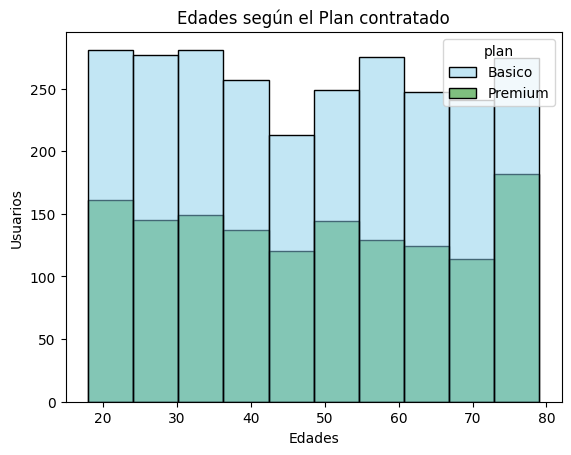

In [ ]:

# Histograma para visualizar la edad (age)
sns.histplot(
    data=user_profile,
    x='age',
    bins=10,
    hue='plan',
    palette=['skyblue', 'green']
)

plt.title("Edades según el Plan contratado")
plt.ylabel("Usuarios")
plt.xlabel("Edades")
plt.show()


💡Insights:
- La distribución es bastante uniforma, y el polan básico parece dominar en todos los grupos de edades. Sólo en el rango de 73-78 años parece ser más frecuente el plan básico, pero en este punto, la edad no parecería ser determinante al momento de elegir un plan.

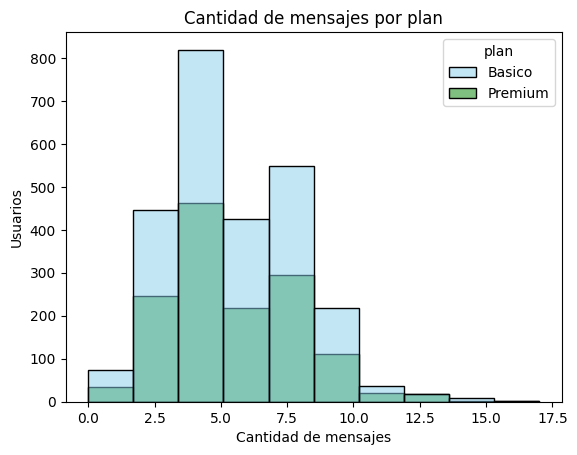

In [ ]:

# Histograma para visualizar la cant_mensajes
sns.histplot(
    data=user_profile,
    x= 'cant_mensajes',
    bins = 10,
    hue = 'plan',
    palette = ['skyblue', 'green']
)

plt.title("Cantidad de mensajes por plan")
plt.ylabel("Usuarios")
plt.xlabel("Cantidad de mensajes")
plt.show()


💡Insights:
- La cantidad de mensajes más frencuente está entre 3 y cinco. La distribución es asimétrica hacia la derecha (right-skewed); pocas personas envían muchos mensajes, y de estos, son en su mayoría del plan premium.

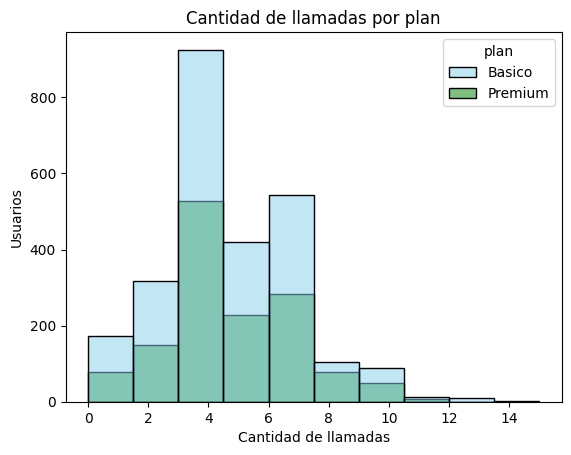

In [ ]:
# Histograma para visualizar la cant_llamadas

sns.histplot(
    data= user_profile,
    x = 'cant_llamadas',
    bins = 10,
    hue = 'plan',
    palette = ['skyblue', 'green']
)

plt.title('Cantidad de llamadas por plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Usuarios')
plt.show()



💡Insights:
- La distribución que presentan las llamadas es similar a la que se da en la cantidad de mensajes, pues es asimetrica con sesgo a la derecha, lo que indica que pocas personas hacen muchas llamadas. El número de llamadas más habitual se da entre 3 y 4.2.

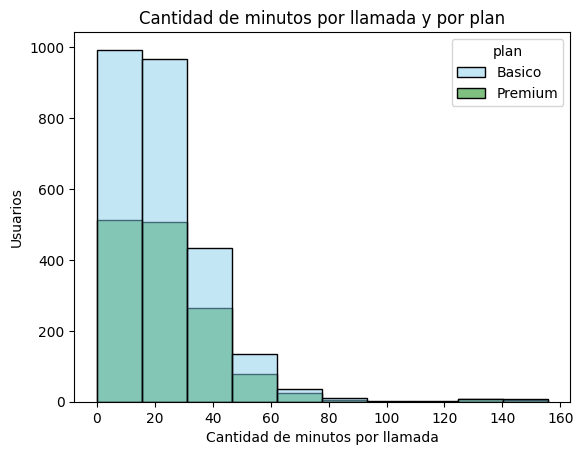

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data= user_profile,
    x = 'cant_minutos_llamada',
    bins = 10,
    hue = 'plan',
    palette = ['skyblue', 'green']
)

plt.title('Cantidad de minutos por llamada y por plan')
plt.xlabel('Cantidad de minutos por llamada')
plt.ylabel('Usuarios')
plt.show()


💡Insights:
- Distribución con sesgo hacia la derecha muy acentuado. La mayoría de las llamadas está en el rango de 0 a 30 minutos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

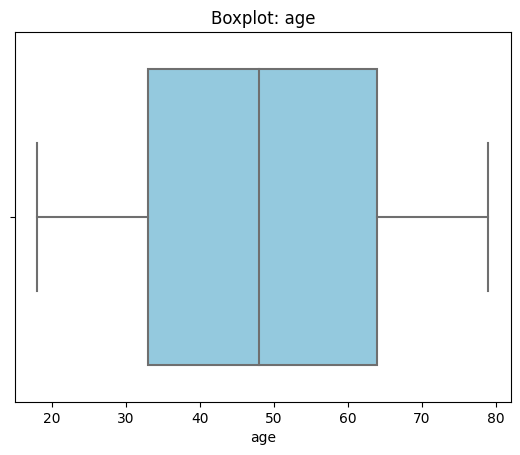

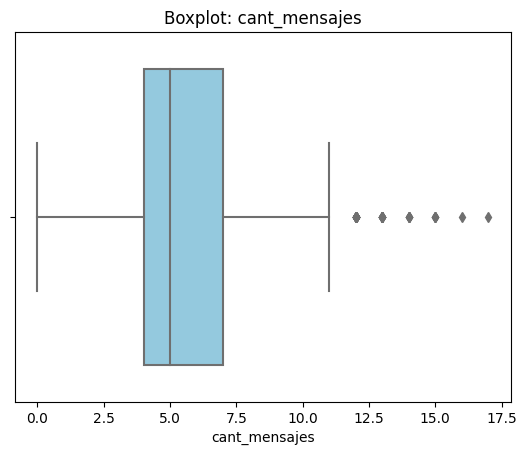

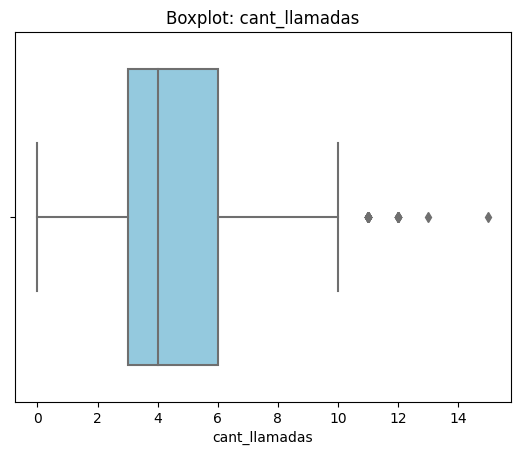

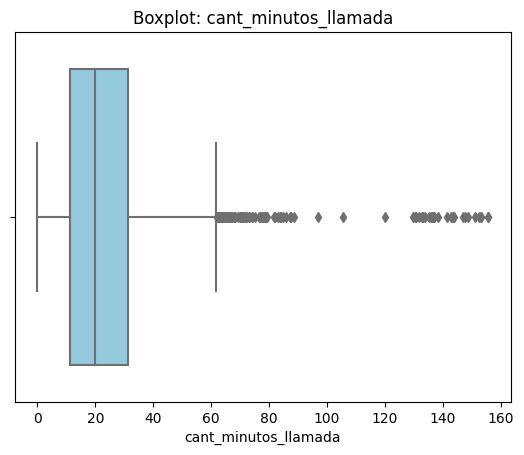

In [ ]:

# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(user_profile[col], color = 'skyblue')
    plt.title(f'Boxplot: {col}')
    plt.show()


💡Insights:
- Age: No presenta outliers. La distribución de edad es relativamente amplia y bastante simétrica. La población está bien distribuida entre jóvenes y adultos mayores.
- cant_mensajes: Presenta outliers. La distribución es asimétrica hacia la derecha. Los outliers descartan a la media como medida representativa.
- cant_llamadas: Presenta outliers. Mediana en 4 llamadas, es decir que el 50% de los usuarios realiza 4 o menos llamadas.
- cant_minutos_llamada: Presenta outliers. Mediana entre 20 y 22 minutos. Mucha dispersión en los datos. Asimetría muy positiva hacia la derecha.

In [ ]:

# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    #Calcular Q1
    Q1 = user_profile[col].quantile(0.25) # No era necesario calcularlo, pero se calcula para tener completo el procedimiento.
    Q3 = user_profile[col].quantile(0.75)
    #Calcular IQR
    IQR = Q3 - Q1
    #Calcular límite inferior:
    lower = Q1 - 1.5 * IQR
    # Calcular límite superior:
    upper = Q3 + 1.5 * IQR

    print(f'\nVariable: {col}')
    print(f'Límite inferior: {lower}')
    print(f'Límite superior: {upper}')



Variable: cant_mensajes
Límite inferior: -0.5
Límite superior: 11.5

Variable: cant_llamadas
Límite inferior: -1.5
Límite superior: 10.5

Variable: cant_minutos_llamada
Límite inferior: -19.322500000000005
Límite superior: 61.8575


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: mantener o no outliers, porqué? El outlier se mantiene. Son datos de comportamiento humano mjuy variable. 17 mensajes es muy probable.
- cant_llamadas: mantener o no outliers, porqué? El outlier se mantiene. Son datos de comportamiento humano mjuy variable. 15 llamadas es muy probable.
- cant_minutos_llamada: mantener o no outliers, porqué? El outlier se mantiene. Si bien aquí hay outliers que se alejan mucho del límite superior, llamadas de 155 minutos son probables. Tal vez hacer una winsorización, pero viendo el boxplot, podría no ser demasiado útil. Si por el momento es un análisis descriptivo, se quedarían

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
def grupo_por_uso(row):
    if row['cant_mensajes'] < 5 and row['cant_llamadas'] < 5:
        return 'Bajo uso'
    elif row['cant_mensajes'] < 10 and row['cant_llamadas'] < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(grupo_por_uso, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53,Medellín,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
def grupo_por_edad(row):
    if row['age'] < 30:
        return 'Joven'
    elif row['age'] < 60:
        return 'Adulto'
    else:
        return 'Adulto mayor'

user_profile['grupo_edad'] = user_profile.apply(grupo_por_edad, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53,Medellín,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto mayor
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

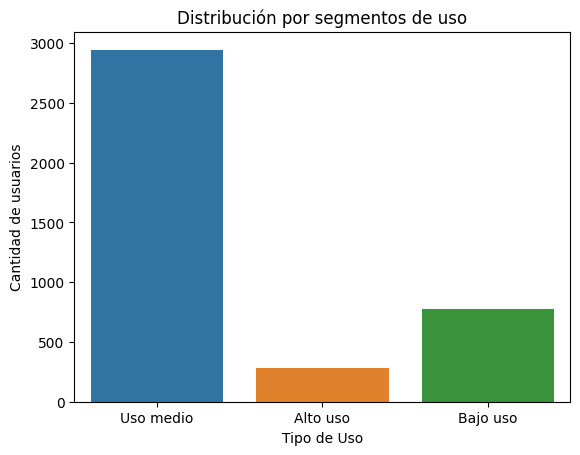

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(
    data=user_profile,
    x= 'grupo_uso'
)

plt.title("Distribución por segmentos de uso")
plt.xlabel('Tipo de Uso')
plt.ylabel('Cantidad de usuarios')
plt.show()

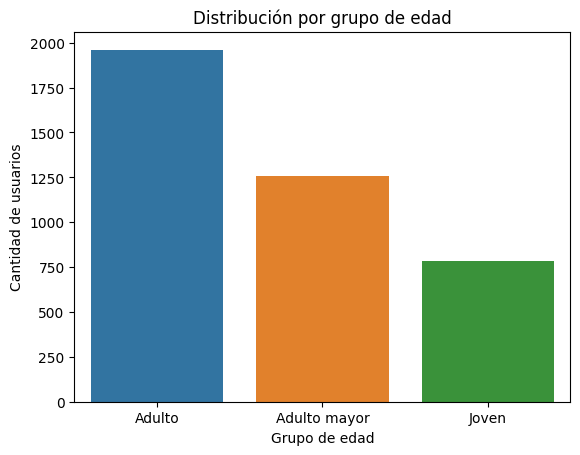

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(
    data=user_profile,
    x= 'grupo_edad'
)

plt.title("Distribución por grupo de edad")
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- En el df de 'users' había faltantes en la columna 'city' (469 que son el 11.72%) y aparecía también el sentinel '?', el cual fue reempazado por NA.
- En el df de 'users' la columna 'churn_date' estaba como texto (object) y no como fecha. Presenta un 88.35% de faltantes, pero se interpretan como faltantes por no haber cancelación del servicio
- En el df de 'users', la columna 'reg_date' estaba como texto (object) y no como fecha.
- en el df de 'users', la columna 'age' tenía sentinel -999, que se reemplazó con la mediana de la misma columna.
- En el df de 'usage' la columna 'date' estaba como texto (object) y faltaba una cantidad muy pequeña de datos(.125%)
- Se hizo la corrección y estandarización de fechas en fechas.
- En 'reg_date' se encongtraron fechas con año 2026, que fueron sustituidos por NA.


🔍 **Segmentos por Edad**
- La edad no parece ser determinante al momento de elegir un plan. En todo caso, el sector Premium está más presente en el rango de edad del 73 a 79 años.
- Es bastante uniforme la distribución entre edad y plan contratado.
- El grupo de edad de "Adultos" es el ás presente, seguido por los "Adultos mayores"


📊 **Segmentos por Nivel de Uso**
- El uso medio es, con diferencia, el prevalente, seguido por el uso bajo y, finalmente, un alto uso no muy frecuente, pero real.
- El uso medio es la base del negocio, que representa también un equilibrio saludable y es donde más se tiene que trabajar para evbitar el churn, aplicando campañas de fidelización.


➡️ Esto sugiere que ...


💡 **Recomendaciones**
- Los jóvenes representan el grupo etario menos frecuente en la empresa. Incluso el grupo de adultos mayores es mayor. Hay una gran oportunidad de negocio en esa área, con mucho potencvial de crecimiento, por lo que se recomiendan aumentar la publicidad a ese sector.
- Por otra parte, el grupo de adultos es el más consolidado. Como se vio, la edad no parece ser un factor determinante para la elección del plan, pero se puede aprovechar la base de adultos para tratar de posicionarlos en el plan premium, mayores promociones u ofertas que los motiven a cambiarse al plan premium.
- Las llamadas más frecuentas son aquellas cuya duración se da entre los 0 y 30 minutos. Predomina el plan básico. Ya está el hábito de esas llamadas, se podría pensar en alguna promoción que fomente la contratación del plna premium.
- El grupo de adultos mayores, si bien bastante homogéneo en su consumo con los demás grupos etarios, es el que más presente está en el sector premium. No está claro qué sea lo que los motive a la contratación de ese plan y convendría investigarlo para hacer hincapié en lo que encuentran valioso de ese plan y tratar de extrapolarlo a los otros grupos.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`